In [1]:
# Kerasの必要なコンポーネントをインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils


In [4]:
# Scikit-learn(Sklearn)のインポート
from sklearn.datasets import fetch_openml

In [6]:
# データを高速かつ効率的に使えるPandasをインポート
import pandas as pd
# 数値計算を効率的に行うNumpyをインポート
import numpy as np


In [8]:
# Scikit-learn経由でMNISTのオリジナルデータをダウロード
mnist = fetch_openml('mnist_784', version=1)

In [9]:
# 説明変数と目的変数に切り分けます
X, y = mnist['data'], mnist['target']

In [11]:
# numpyのshape関数を使ってXのサイズを確認
X.shape, y.shape

((70000, 784), (70000,))

In [12]:
# Xの53238番目のデータをtest_numberへ切り出す
test_number = X[53238]
# reshape関数を使って784を28x28へ変換する
test_number_image = test_number.reshape(28,28)
# pandasのカラム表示の設定を変更
pd.options.display.max_columns = 28
# Numpy配列からPandasのデータフレームへ変換
number_matrix = pd.DataFrame(test_number_image)
# number_matrixの表示
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,74.0,194.0,254.0,254.0,255.0,254.0,211.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,82.0,207.0,254.0,235.0,172.0,136.0,136.0,178.0,253.0,235.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,113.0,253.0,235.0,111.0,21.0,0.0,0.0,0.0,6.0,220.0,253.0,198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


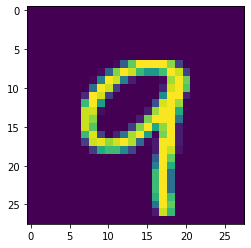

In [16]:
# imshowを使って表示test_number_image（Numpy配列）を画像で表示
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(test_number_image, cmap =  , interpolation='nearest')
plt.show()

In [17]:
# 53238番目のYの値を出力
y[53238]

'9'

In [18]:
# 訓練データとテストデータを切り分ける
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_test_backup = y_test
# 両方のサイズを確認
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
# 28x28x1のサイズへ変換しましょう
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [21]:
# 正規化（ピクセルの最大値は255）
X_train /= 255
X_test /= 255

In [22]:
# ターゲットとなるyを変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# y_testの1を表示
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
# モデルの宣言
model = Sequential()

In [26]:
# 先に作成したmodelへレイヤーを追加
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
# Learnig Processの設定
model.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])


In [28]:
# 注意 - 10〜15分程度かかります
# モデルの訓練（エポック １０）
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 64s 33ms/step - loss: 0.8512 - accuracy: 0.7638
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2678 - accuracy: 0.9192
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2032 - accuracy: 0.9401
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1684 - accuracy: 0.9494
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1444 - accuracy: 0.9558
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1223 - accuracy: 0.9628
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1123 - accuracy: 0.9651
Epoch 8/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1013 - accuracy: 0.9700
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0928 - accuracy: 0.9709
Epoch 10/10
1875/1875 [==============================] - 61s 32m

In [29]:
# テストデータを使ってモデルの評価
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

79/79 [==============================] - 2s 21ms/step - loss: 0.0765 - accuracy: 0.9764
[0.07645954936742783, 0.9764000177383423]


In [33]:
# X_testを使って予測を行う
predictions = model.predict_classes(X_test)
x = list(predictions)
y = list(y_test_backup)
results = pd.DataFrame({'Actual': y, 'Predictions': x})
results[1:20]

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Actual,Predictions
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
10,0,0
